In [7]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# We load the data
df = pd.read_csv("datasets/training_1.csv")
df.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [3]:
# Let's drop the not interesting columns
df.drop(["DATETIME"],axis=1,inplace=True)
for column in df:
    if df[column].std() == 0:
        df.drop([column],axis=1,inplace=True)
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,99.018150,1,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,99.115639,1,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,98.440498,1,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,97.594460,1,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,97.370277,1,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263


In [4]:
# Normalization
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.041663,0.326844,0.120893,0.294027,0.474946,0.728796,0.128789,0.362889,0.988791,1.0,...,0.441344,0.754011,0.444055,0.575244,0.190652,0.769913,0.195089,0.346838,0.097967,0.478234
1,0.020317,0.319408,0.297909,0.308547,0.638842,0.992383,0.202221,0.365508,0.989764,1.0,...,0.441075,0.815632,0.443421,0.608323,0.188221,0.775343,0.192696,0.348032,0.096095,0.475637
2,0.000000,0.315129,0.493043,0.466649,0.795042,1.000000,0.302105,0.347369,0.983022,1.0,...,0.441442,0.869400,0.443424,0.621653,0.222958,0.835157,0.227449,0.465977,0.096111,0.475659
3,0.002805,0.319432,0.702160,0.648073,0.926695,1.000000,0.544778,0.324639,0.974574,1.0,...,0.448463,0.920844,0.450190,0.649743,0.521689,0.206488,0.522436,0.552520,0.101490,0.483118
4,0.035899,0.334301,0.923501,0.895404,0.770673,1.000000,0.858088,0.318617,0.972335,1.0,...,0.460010,0.983674,0.461483,0.696660,0.530118,0.208966,0.530791,0.562153,0.108498,0.492837


In [5]:
# Symbolic approximation of time series
n_classes = 4
df = np.trunc(df/(1./n_classes) - 0.00001)
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,3.0,3.0,...,1.0,3.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,1.0,2.0,3.0,0.0,1.0,3.0,3.0,...,1.0,3.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0
2,-0.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0
3,0.0,1.0,2.0,2.0,3.0,3.0,2.0,1.0,3.0,3.0,...,1.0,3.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0
4,0.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,...,1.0,3.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0


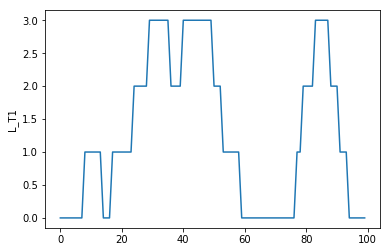

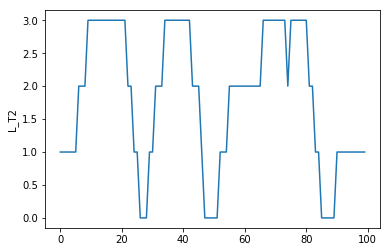

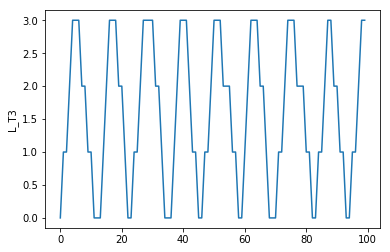

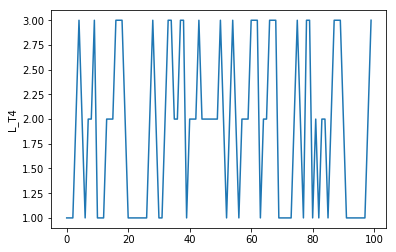

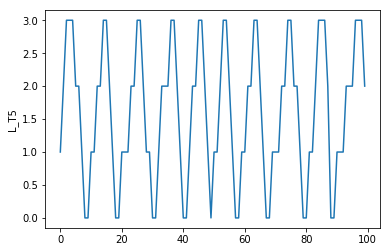

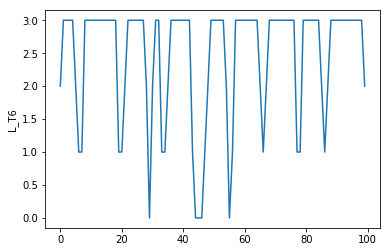

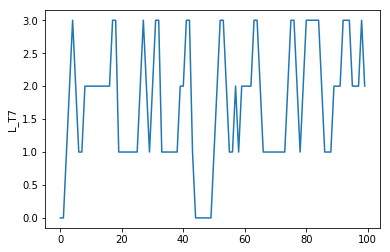

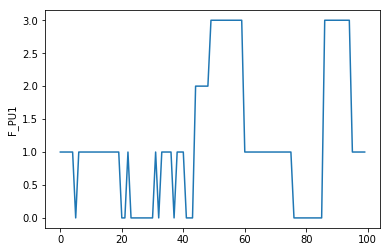

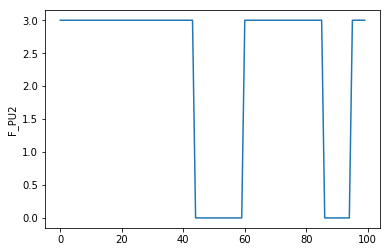

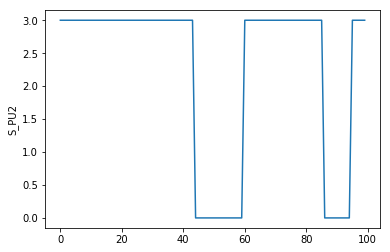

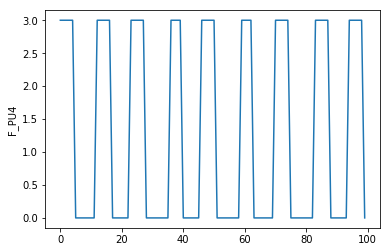

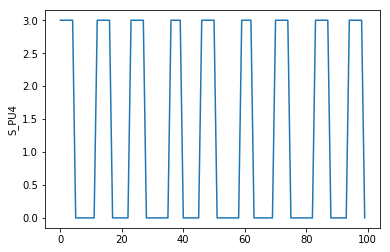

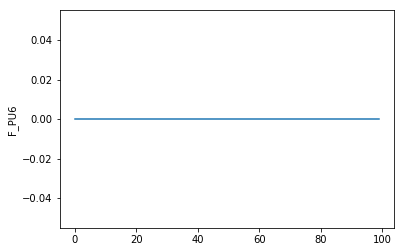

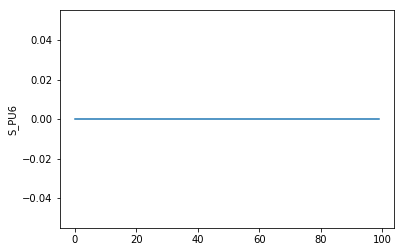

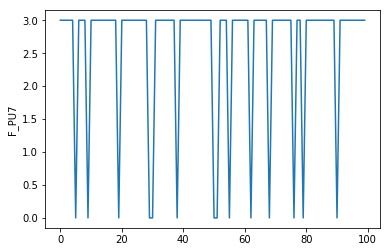

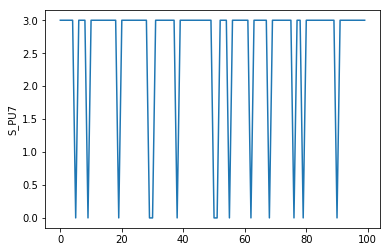

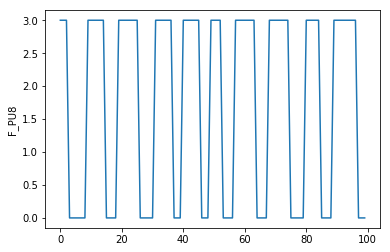

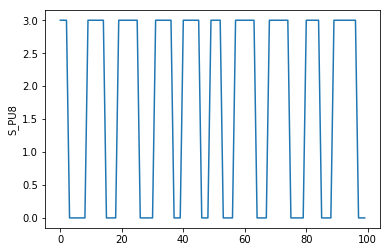

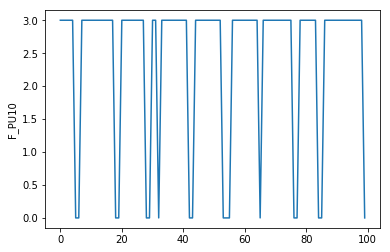

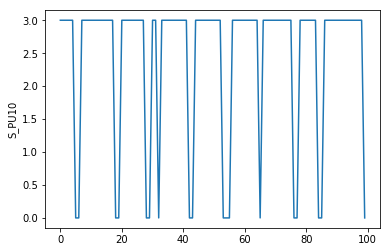

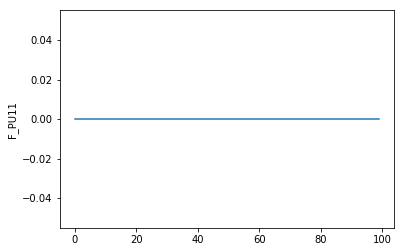

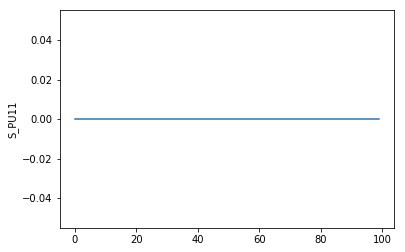

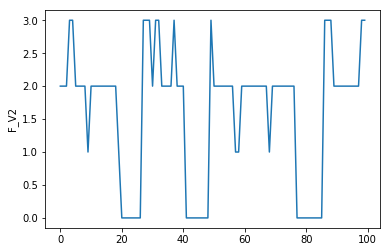

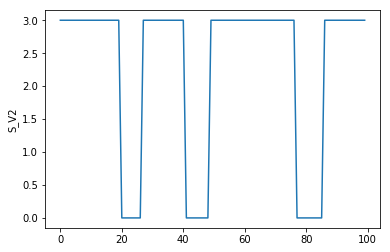

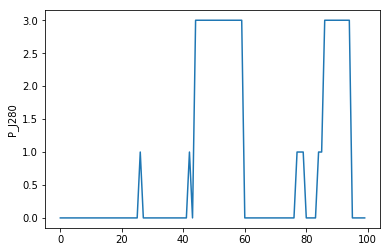

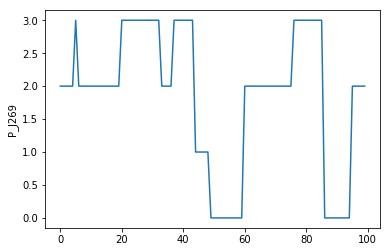

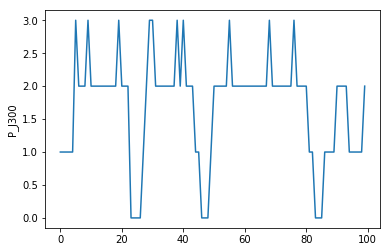

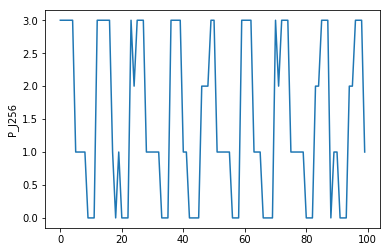

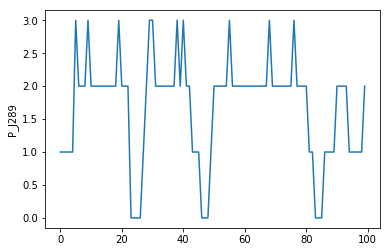

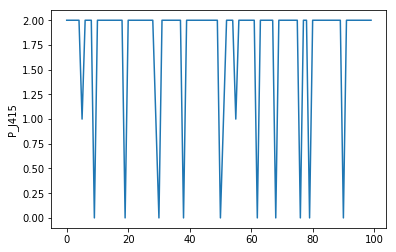

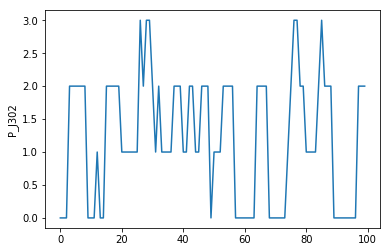

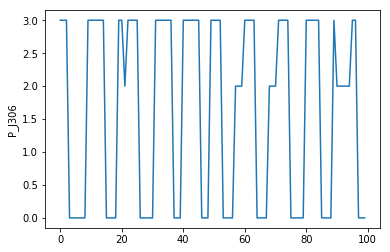

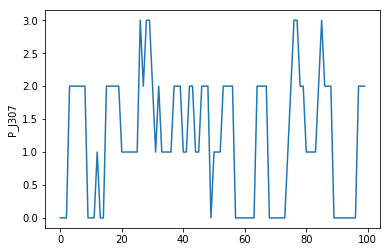

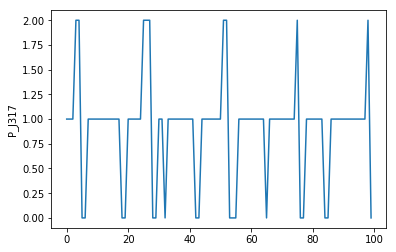

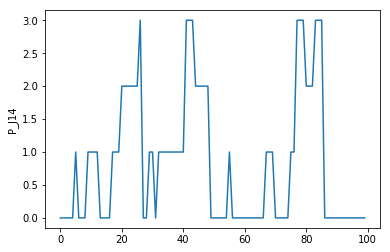

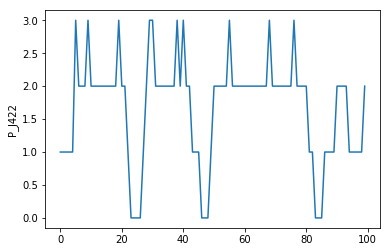

In [6]:
for column in df:
    plt.plot(df[column][:100],'-')
    plt.ylabel(column)
    plt.show()

In [33]:
class MarkovChain:

    def __init__(self):
        self.memory = {}
        self.trans_matrix = []

    def _learn_key(self, key, value):
        if key not in self.memory:
            self.memory[key] = []
        self.memory[key].append(value)

    def learn(self, tokens):
        bigrams = [(tokens[i], tokens[i + 1]) for i in range(0, len(tokens) - 1)]
        print bigrams
        for bigram in bigrams:
            self._learn_key(bigram[0], bigram[1])
        self._learn_trans_matrix()
            
    def _learn_trans_matrix(self):
        states = self.memory.keys()
        states.sort()
        self.trans_matrix = []
        for key in self.memory:
            occurrences = []
            # Count occurrences (with Laplace smoothing)
            for s in states:
                occurrences.append(self.memory[key].count(s)+1)
                
            # Gen probabilities
            total = float(sum(occurrences))
            row = [ i/total for i in occurrences]
            self.trans_matrix.append(row)
            


In [34]:
m = MarkovChain()
m.learn([1,2,3,1,2,3,4,2,1,3,4,5,1,2,4,2])
print m.memory
print m.trans_matrix

[(1, 2), (2, 3), (3, 1), (1, 2), (2, 3), (3, 4), (4, 2), (2, 1), (1, 3), (3, 4), (4, 5), (5, 1), (1, 2), (2, 4), (4, 2)]
{1: [2, 2, 3, 2], 2: [3, 3, 1, 4], 3: [1, 4, 4], 4: [2, 5, 2], 5: [1]}
[[0.1111111111111111, 0.4444444444444444, 0.2222222222222222, 0.1111111111111111, 0.1111111111111111], [0.2222222222222222, 0.1111111111111111, 0.3333333333333333, 0.2222222222222222, 0.1111111111111111], [0.25, 0.125, 0.125, 0.375, 0.125], [0.125, 0.375, 0.125, 0.125, 0.25], [0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]]
